In [191]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [192]:
#READ DATASET
df=pd.read_csv('Algerian_forest_dataset_cleanede.csv')
df.head()
#ENCODED CATEGORIES IN CLASSES 
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [193]:
#DIVIDE DATASET INTO DEPENDENT AND INDEPEN. 
X=df.drop('Classes',axis=1)
y=df['FWI']

In [194]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

<Axes: >

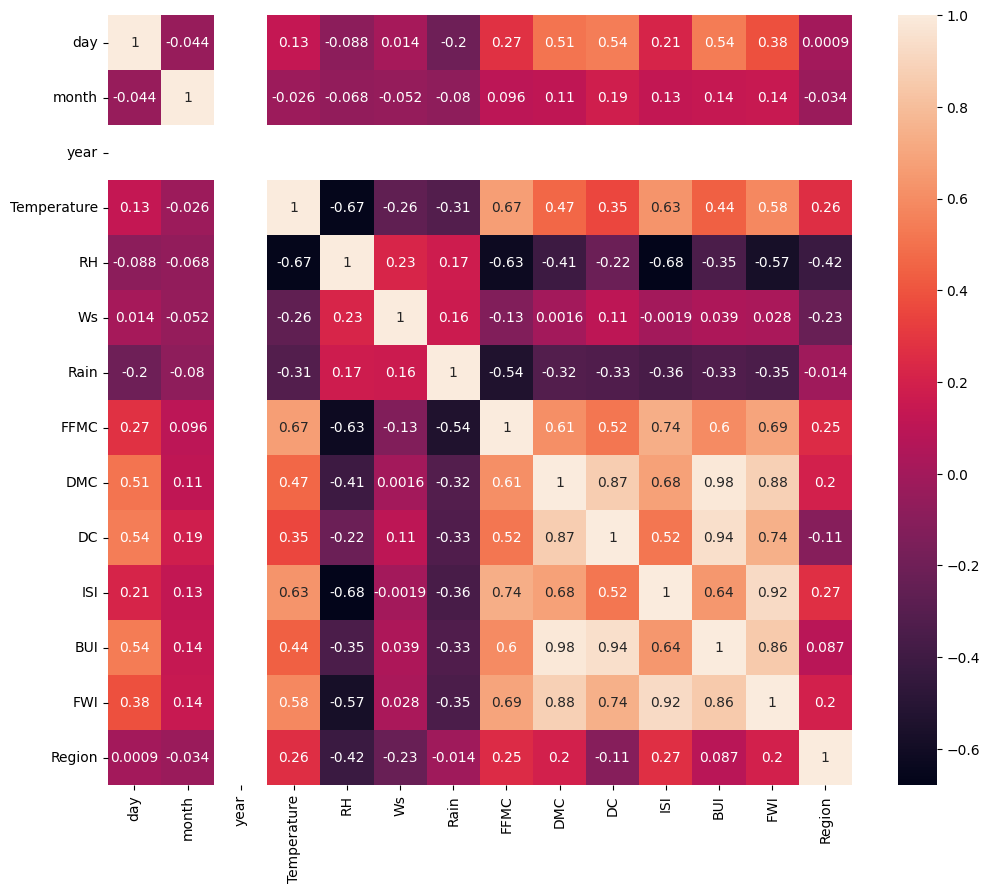

In [195]:
#CHECK FOR MULTICOLLINEARITY
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [196]:
def correlation(dataset,threshold):
    col_corr=set() #SO Value Not Repeated
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)): #Traversing Every Column
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:#I,J are labels
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [197]:
#threshold 
corr_features=correlation(X_train,0.85)

In [198]:
print(corr_features)

{'FWI', 'DC', 'BUI'}


In [199]:
#DROP FEATURES  WITH MULTICOL
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)


In [200]:
X_train.shape

(194, 11)

In [201]:
#FEATURE SCALING OR STANDARIZATION
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X_train_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.transform(X_test)

In [202]:
X_train_scaled

array([[-1.71781867, -1.2915889 ,  0.        , ..., -0.93663148,
        -0.85897231, -1.05294618],
       [-1.48011766, -0.39988696,  0.        , ..., -0.41572186,
        -0.05061429,  0.94971616],
       [-0.29161258, -0.39988696,  0.        , ..., -0.28342735,
        -0.16949047,  0.94971616],
       ...,
       [ 0.42149046, -1.2915889 ,  0.        , ..., -0.85394742,
        -0.93029802,  0.94971616],
       [ 0.89689249,  1.38351694,  0.        , ...,  1.21315429,
         0.61509231,  0.94971616],
       [-0.88586512, -0.39988696,  0.        , ..., -0.18420647,
         0.25846378, -1.05294618]], shape=(194, 11))

Text(0.5, 1.0, 'AFTER SCALING')

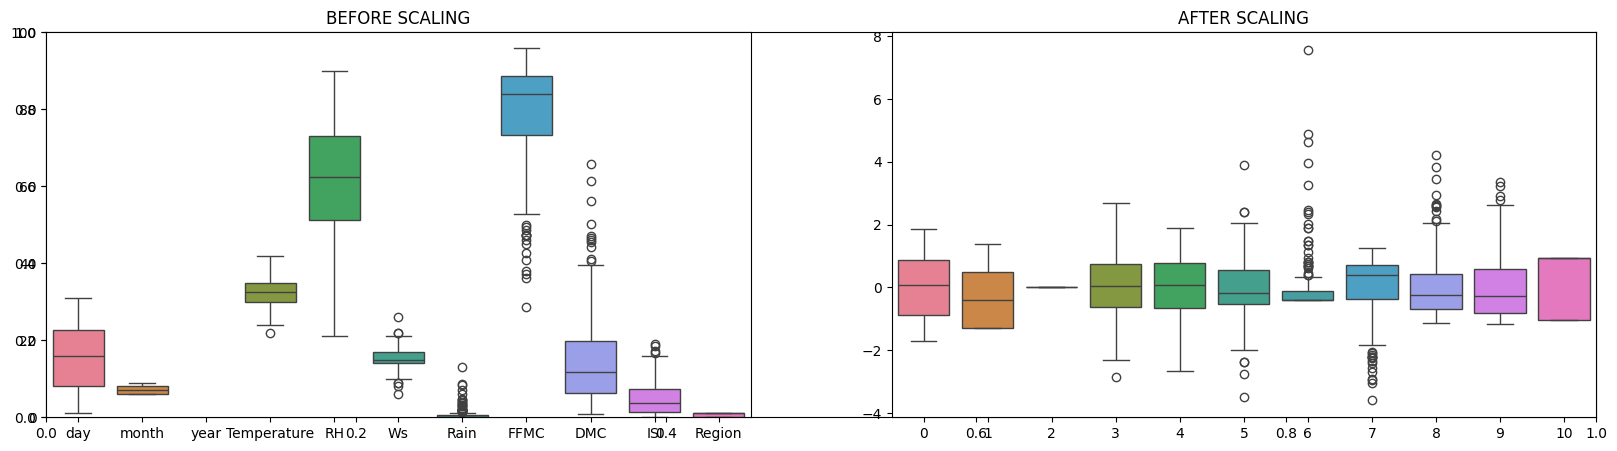

In [203]:
plt.subplots(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.ylim(0,100)
plt.title('BEFORE SCALING')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)

plt.title("AFTER SCALING")


In [204]:
#BUILD REGRESSION MODEL
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#TRAIN MODEL
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
#PERFORMANCE METRICS
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print("R2 Score",r2_score(y_test,y_pred))


R2 Score 0.9720250860030929


In [205]:
#LASSO REGRE
from sklearn.linear_model import Lasso
model=Lasso()
#TRAIN MODEL
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
#PERFORMANCE METRICS
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print("R2 Score",r2_score(y_test,y_pred))



R2 Score 0.9432589387184452


In [209]:
#RIDGE REGRES
from sklearn.linear_model import Ridge
rid_model=Ridge()
#TRAIN MODEL
rid_model.fit(X_train_scaled,y_train)
y_pred=rid_model.predict(X_test_scaled)
#PERFORMANCE METRICS
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print("R2 Score",r2_score(y_test,y_pred))


R2 Score 0.9713803069239944


In [210]:
#ELASTIC RE
#RIDGE REGRES
from sklearn.linear_model import ElasticNet
elas_model=ElasticNet()
#TRAIN MODEL
elas_model.fit(X_train_scaled,y_train)
y_pred=elas_model.predict(X_test_scaled)
#PERFORMANCE METRICS
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print("R2 Score",r2_score(y_test,y_pred))


R2 Score 0.8743642143242446


In [212]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(rid_model,open('model.pkl','wb'))